In [91]:
import numpy as np
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from scipy.stats import norm
from sympy import Symbol, symbols, Matrix, sqrt, diff, Sum, exp
from sympy import init_printing
init_printing(use_latex=True)

In [40]:
states=3

### Dynamic Equations

<img src="5.png" alt="Drawing" style="width: 400px;"/>

#### Developing the math behind dynamic model

In [84]:
from sympy.abc import alpha, x, y, v, w, R, theta
import math

dts, xs, ys, zs, lats, lons = symbols('T x y z lat lon')

gs = Matrix([[alpha*xs-w*ys],
             [alpha*ys+w*xs],
             [1],
            ])
state = Matrix([xs,ys,zs])

In [53]:
gs

⎡α⋅x - w⋅y⎤
⎢         ⎥
⎢α⋅y + w⋅x⎥
⎢         ⎥
⎣    1    ⎦

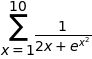

In [92]:
expr=Sum(1/(exp(x**2)+2*x),(x,1,10))
expr

In [57]:
alpha=1-(sqrt((xs)**2+ys**2))
gs = Matrix([[alpha*xs-w*ys],
             [alpha*ys+w*xs],
             [1],
            ])
gs

⎡         ⎛     _________    ⎞⎤
⎢         ⎜    ╱  2    2     ⎟⎥
⎢-w⋅y + x⋅⎝- ╲╱  x  + y   + 1⎠⎥
⎢                             ⎥
⎢        ⎛     _________    ⎞ ⎥
⎢        ⎜    ╱  2    2     ⎟ ⎥
⎢w⋅x + y⋅⎝- ╲╱  x  + y   + 1⎠ ⎥
⎢                             ⎥
⎣              1              ⎦

In [58]:
state

⎡x⎤
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [59]:
gs.jacobian(state)

⎡        2           _________                                          ⎤
⎢       x           ╱  2    2                        x⋅y                ⎥
⎢- ──────────── - ╲╱  x  + y   + 1          -w - ────────────          0⎥
⎢     _________                                     _________           ⎥
⎢    ╱  2    2                                     ╱  2    2            ⎥
⎢  ╲╱  x  + y                                    ╲╱  x  + y             ⎥
⎢                                                                       ⎥
⎢                                           2           _________       ⎥
⎢                x⋅y                       y           ╱  2    2        ⎥
⎢        w - ────────────           - ──────────── - ╲╱  x  + y   + 1  0⎥
⎢               _________                _________                      ⎥
⎢              ╱  2    2                ╱  2    2                       ⎥
⎢            ╲╱  x  + y               ╲╱  x  + y                        ⎥
⎢                                     

### Initial Equations

<img src="1.png" alt="Drawing" style="width: 400px;"/>

### Values for Z

<img src="2.png" alt="Drawing" style="width: 400px;"/>

### Dynamic Equations

<img src="3.png" alt="Drawing" style="width: 400px;"/>

 ### $A_k$

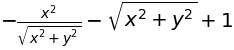

In [72]:
A=diff(gs[0],x)
A

 ### $F_k$

In [74]:
F=diff(gs[0],w)
F

 ### $C_k$

In [75]:
C=diff(gs[1],w)
C

 ### $G_k$

In [76]:
G=diff(gs[1],v)
G

### Initial Uncertainty $P_0$

In [78]:
P = np.diag([1000.0, 1000.0, 1000.0])
print(P, P.shape)

(array([[1000.,    0.,    0.],
       [   0., 1000.,    0.],
       [   0.,    0., 1000.]]), (3, 3))
